In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
def U(x):
    return np.abs(x-2)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:45<00:00, 109.90it/s]


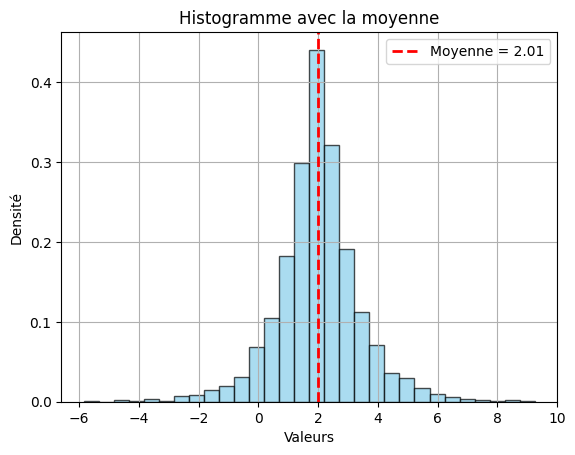

In [ ]:
if __name__ == "__main__":
    v = 1
    x_init = 20
    n_iter = 1000
    n_points = 5000
    samples  = np.array([metropolis_sampler(x_init, v, U, n_iter)[-1] for _ in tqdm(range(n_points))])

    plt.hist(samples, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    mean_value = np.mean(samples) 

    # Afficher
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne = {mean_value:.2f}')

# Ajouter titre et légende
    plt.title("Histogramme avec la moyenne")
    plt.xlabel("Valeurs")
    plt.ylabel("Densité")
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
def gaussian_potential(x, m, v):
    return (x-m)**2/(2*v)

def coupling_gaussian(m1, m2, v):
    x = np.random.normal(m1, v)
    log_w = np.log(np.random.uniform(0,1))
    if log_w <= gaussian_potential(x, m1, v) - gaussian_potential(x, m2, v):
        return x, x
    else:
        y = np.random.normal(m2, v)
        log_w = np.log(np.random.uniform(0,1))
        while log_w <= gaussian_potential(y, m2, v) - gaussian_potential(y, m1, v):
            y = np.random.normal(m2, v)
            log_w = np.log(np.random.uniform(0,1))
        
        return x, y


def MH_coupling_step(x, y, v, U):
    #print('before coupling', (x, y))
    proposal_x, proposal_y = coupling_gaussian(x, y, v) 
    #print('proposals', (proposal_x, proposal_y))

    log_w = np.log(np.random.uniform(0, 1))
    if log_w < U(x) - U(proposal_x):
        x = proposal_x
    if log_w < U(y) - U(proposal_y):
        y = proposal_y
    #print('aftre coupling', (x, y))
    return x, y

def MH_couplig(x_init, y_init, v, U, n_iter):
    samples = [(x_init, y_init)]
    x, y = x_init, y_init
    for _ in range(n_iter):
        x, y = MH_coupling_step(x, y, v, U)
        samples.append((x, y))
        #print('in samples', (x,y))
    return samples

In [4]:
if __name__ == "__main__":
    v = 1
    x_init = 10
    y_init = 20
    n_iter = 500

    samples  = MH_couplig(x_init, y_init, v, U, n_iter)

    x_samples = [samples[i][0] for i in range(len(samples))]
    y_samples = [samples[i][1] for i in range(len(samples))]


    meet_time = 0
    while x_samples[meet_time] != y_samples[meet_time]:
        meet_time+= 1
    
        

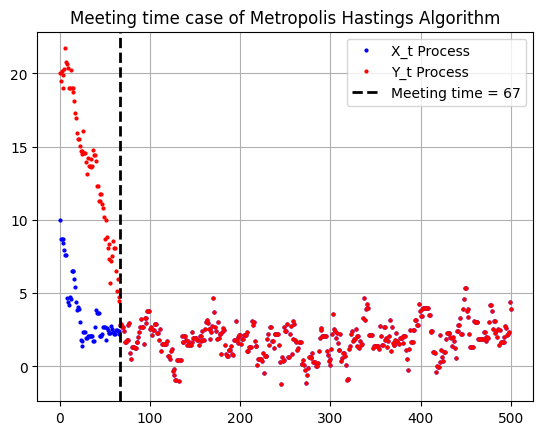

In [5]:
x = np.arange(len(samples))
plt.plot(x, x_samples, marker='o', linestyle='None', markersize=2, color='blue', label = 'X_t Process')
plt.plot(x, y_samples, marker='o', linestyle='None', markersize=2, color='red', label = 'Y_t Process')
plt.axvline(meet_time, color='black', linestyle='dashed', linewidth=2, label=f'Meeting time = {meet_time}')
plt.title("Meeting time case of Metropolis Hastings Algorithm")
plt.grid(True)
plt.legend()
plt.show()

In [16]:
if __name__ == "__main__":
    v = 1
    x_init = 20
    y_init = 10
    meet_times = []
    N = 1000
    L = 0 # L << N

    meet_times = []
    for _ in tqdm(range(N)):
        samples  = MH_couplig(x_init, y_init, v, U, n_iter)

        x_samples = [samples[i][0] for i in range(len(samples))]
        y_samples = [samples[i][1] for i in range(len(samples))]
        for i in range(L, len(samples)):
            if x_samples[i] == y_samples[i]:
                meet_times.append(i)
                break
            
    print(meet_times)

100%|██████████| 1000/1000 [00:08<00:00, 123.68it/s]

[61, 82, 65, 16, 40, 65, 55, 112, 44, 55, 57, 73, 82, 86, 91, 63, 64, 66, 62, 63, 63, 74, 95, 40, 83, 68, 28, 61, 58, 29, 64, 48, 46, 106, 57, 38, 98, 28, 78, 68, 109, 51, 47, 41, 66, 15, 46, 41, 22, 59, 120, 29, 44, 70, 107, 104, 123, 48, 59, 78, 66, 29, 58, 27, 70, 51, 74, 53, 41, 80, 115, 82, 42, 66, 69, 60, 93, 62, 28, 51, 50, 79, 59, 52, 75, 21, 97, 69, 56, 46, 52, 79, 63, 85, 97, 58, 22, 48, 12, 69, 46, 63, 66, 61, 42, 55, 59, 99, 73, 77, 51, 44, 44, 54, 47, 69, 22, 15, 91, 85, 49, 70, 65, 56, 47, 62, 38, 71, 34, 44, 73, 42, 24, 68, 16, 47, 52, 54, 61, 70, 98, 69, 126, 60, 57, 35, 107, 48, 89, 123, 91, 51, 84, 76, 61, 60, 91, 57, 42, 58, 80, 85, 80, 54, 62, 82, 57, 45, 119, 60, 57, 42, 38, 77, 35, 66, 42, 41, 52, 59, 19, 47, 101, 96, 58, 64, 48, 70, 93, 52, 86, 87, 69, 43, 81, 85, 85, 93, 69, 35, 61, 61, 97, 54, 72, 91, 77, 50, 106, 57, 57, 34, 74, 38, 58, 43, 88, 32, 66, 85, 69, 71, 46, 55, 59, 75, 109, 47, 54, 68, 17, 79, 34, 45, 88, 105, 74, 33, 132, 10, 118, 11, 110, 32, 66, 

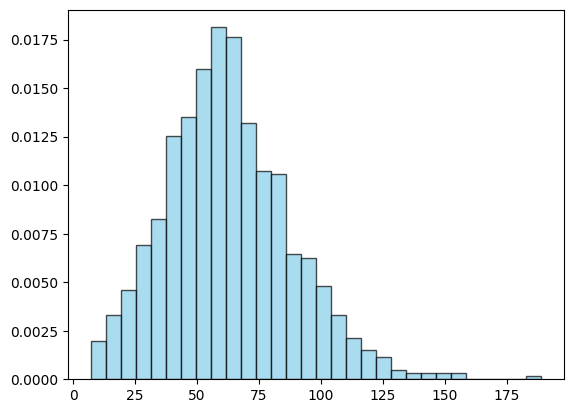

In [18]:

plt.hist(np.array(meet_times)-L, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.show()